# In this notebook we run Latent Dirichlet Kernel on the political twitter data-set 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/democratvsrepublicantweets/TwitterHandles.csv
/kaggle/input/democratvsrepublicantweets/ExtractedTweets.csv
/kaggle/input/rapids/rapids.0.15.0
/kaggle/input/rapids/rapids.0.16.0


In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import keras
import copy
import string
import copy
from matplotlib import pyplot as plt

In [3]:
import string
import pandas as pd
tweets_df=pd.read_csv("/kaggle/input/democratvsrepublicantweets/ExtractedTweets.csv")
tweets_df
tweets_df["Text"]=tweets_df["Tweet"].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)).lower())
tweets_df["Tokenized"]=tweets_df["Text"].apply(lambda x: x.split(" "))

In [4]:
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
corpus_D = list(tweets_df[tweets_df.Party=='Democrat']["Text"])
corpus_R = list(tweets_df[tweets_df.Party=='Republican']["Text"])
corpus = list(tweets_df["Text"])
N_feat=600
vect_D = CountVectorizer(max_features=N_feat)
vect_R = CountVectorizer(max_features=N_feat)
vect = CountVectorizer(max_features=N_feat)
X_D = vect_D.fit_transform(corpus_D)
X_R = vect_R.fit_transform(corpus_R)
X = vect.fit_transform(corpus)
#vect_D.get_feature_names()

# Compute non-negative matrix factorization

In [71]:
from sklearn.decomposition import NMF
nmf=NMF(n_components=2)

In [72]:
cats=nmf.fit_transform(X)
prop=np.divide(cats,np.expand_dims(np.sum(cats,1),1))
cumulative=np.cumsum(prop,1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [73]:
tweets_df['Topics']=len(tweets_df)*[0]
tweets_df['Topics']=list(prop)

In [74]:
tweets_df['Max_topic']=tweets_df['Topics'].apply(np.argmax)
#tweets_df

# Democrat+Republican topic histograms

Text(0.5, 1.0, 'Republican Topics')

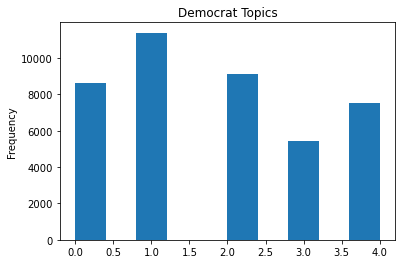

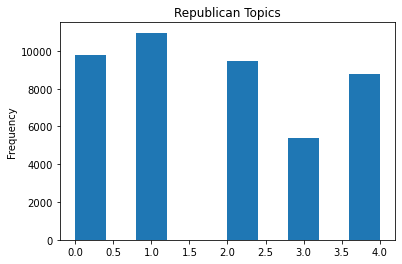

In [75]:
tweets_df[tweets_df.Party=="Democrat"]['Max_topic'].plot.hist()
plt.title("Democrat Topics")
plt.figure()
tweets_df[tweets_df.Party=="Republican"]['Max_topic'].plot.hist()
plt.title("Republican Topics")


In [76]:
words=vect.get_feature_names()
nmf.components_[0,:]>1E-2
t=1E-1
print('topic1',np.array(words)[nmf.components_[0,:]>t])
print('topic2',np.array(words)[nmf.components_[1,:]>t])
print('topic3',np.array(words)[nmf.components_[2,:]>t])
print('topic4',np.array(words)[nmf.components_[3,:]>t])
print('topic5',np.array(words)[nmf.components_[4,:]>t])

topic1 ['2018' 'about' 'across' 'act' 'administration' 'against' 'american' 'amp'
 'are' 'as' 'at' 'be' 'bill' 'budget' 'but' 'by' 'committee'
 'congressional' 'country' 'cuts' 'day' 'deal' 'during' 'first' 'floor'
 'for' 'from' 'gop' 'goptaxscam' 'government' 'had' 'has' 'have' 'hearing'
 'here' 'house' 'housegop' 'hr' 'into' 'is' 'it' 'its' 'just' 'last' 'law'
 'most' 'new' 'news' 'not' 'now' 'on' 'over' 'passed' 'people' 'president'
 'rt' 'senate' 'since' 'states' 'tax' 'taxcutsandjobsact' 'that' 'the'
 'they' 'this' 'time' 'today' 'trump' 'under' 'united' 'us' 'vote' 'was'
 'watch' 'we' 'week' 'which' 'who' 'will' 'with' 'world' 'would' 'year']
topic2 ['about' 'access' 'all' 'am' 'amp' 'an' 'are' 'as' 'at' 'back' 'be' 'bill'
 'bipartisan' 'bring' 'but' 'by' 'can' 'colleagues' 'congratulations'
 'congress' 'continue' 'day' 'discuss' 'do' 'efforts' 'end' 'ensure'
 'fight' 'for' 'forward' 'from' 'get' 'give' 'glad' 'go' 'great' 'happy'
 'has' 'have' 'he' 'health' 'hear' 'help' 'his' '